In [1]:
import numpy as np  # For numerical operations  
import pandas as pd  # For data manipulation and analysis  
import matplotlib.pyplot as plt  # For data visualization  
import seaborn as sns  # For advanced data visualization  

# Importing machine learning tools  
from sklearn.model_selection import train_test_split  # To split data into training and testing sets  
from sklearn.linear_model import LogisticRegression  # For logistic regression model  
from sklearn.metrics import accuracy_score  # To calculate the accuracy of the model  

# Data Collection & Processing

In [3]:
# load the data from csv file to pandas DataFrame
titanic_data = pd.read_csv('train.csv')
titanic_data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [4]:
# getting some informations about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Handling the Missing values

In [7]:
# drop the "Cabin" columns from the dataframe
titanic_data = titanic_data.drop(columns='Cabin',axis=1)

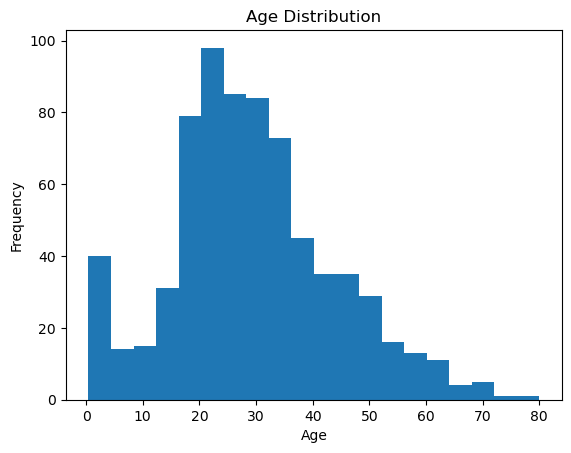

In [8]:
# replaceing the missing values in "Age" column with median value
# choose between mean and median
# Plot a histogram of the Age column
# If the histogram is symmetrical, then use the mean
# If the histogram is skewed (tilted to one side), use the media

# age column
plt.hist(titanic_data['Age'].dropna(),bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [9]:
# Fill missing values in the 'Age' column with the median age  
titanic_data['Age'].fillna(titanic_data['Age'].median(),inplace=True)

C:\Users\rajib\AppData\Local\Temp\ipykernel_3004\3682940555.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].median(),inplace=True)


In [10]:
# age datatype change in integer
titanic_data['Age'] = titanic_data['Age'].astype(int)

In [11]:
# Embarked column
# fill missing values in the Embarked column, use the most frequent value
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [12]:
# Print the most frequent value (mode) in the 'Embarked' column  
print(titanic_data['Embarked'].mode()[0])

S


In [13]:
# Fill missing values in the 'Embarked' column with the most frequent value (mode)  
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

C:\Users\rajib\AppData\Local\Temp\ipykernel_3004\2047685673.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)


In [14]:
# check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Data Analysis Part's

In [16]:
# getting some statistical measures about the data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.345679,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.028212,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
# finding the number of people survived and not survived
titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

# Data Visualization

C:\Users\rajib\AppData\Local\Temp\ipykernel_3004\1416414700.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=titanic_data, palette=['#5A7DBE', '#fffc00'])


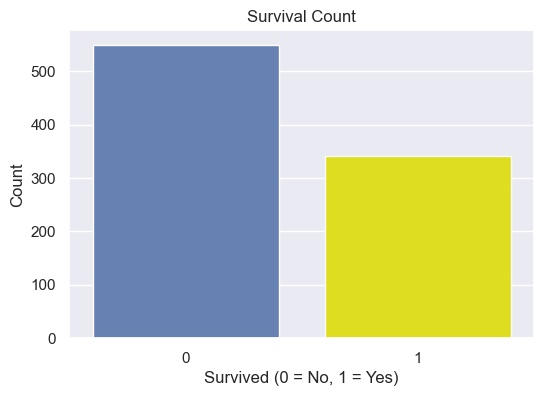

In [19]:
# making a count plot for "Survived" column
sns.set(style="darkgrid")

# Create the bar plot
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=titanic_data, palette=['#5A7DBE', '#fffc00'])
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [20]:
# Count the number of occurrences of each unique value in the 'Sex' column  
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

C:\Users\rajib\AppData\Local\Temp\ipykernel_3004\2356355276.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=titanic_data, palette=['#5A7DBE', '#D18266'])


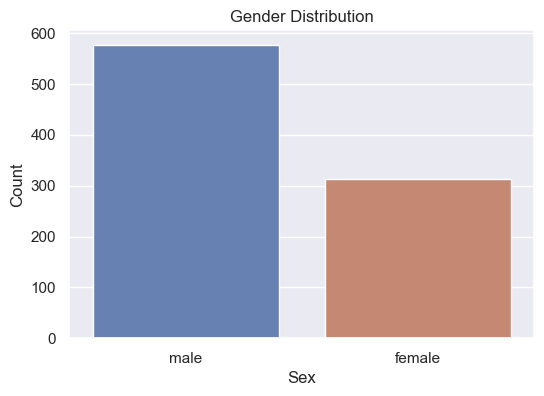

In [21]:
# making a count plot for "Sex"
sns.set(style="darkgrid")

# Create the bar plot for 'Sex' column
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=titanic_data, palette=['#5A7DBE', '#D18266'])
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

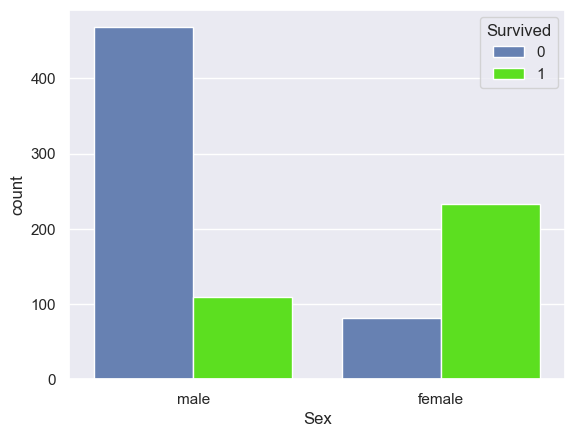

In [22]:
# number of survived gender wise plot
sns.countplot(x='Sex', hue='Survived', data=titanic_data, palette=['#5A7DBE', '#50ff00'])

C:\Users\rajib\AppData\Local\Temp\ipykernel_3004\1124783378.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=titanic_data, palette='Set2')


<Axes: xlabel='Pclass', ylabel='count'>

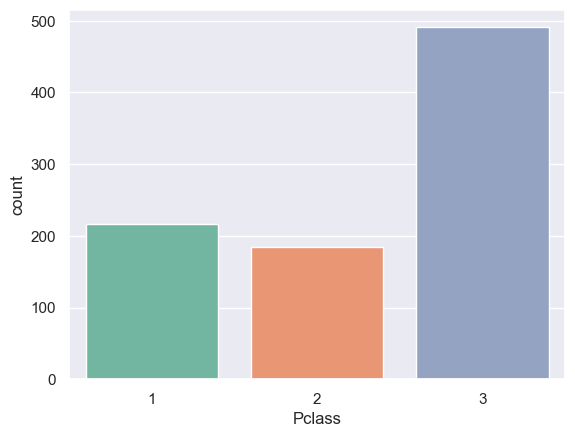

In [23]:
# making a count plot for "Pclass" column
sns.countplot(x='Pclass', data=titanic_data, palette='Set2')

<Axes: xlabel='Pclass', ylabel='count'>

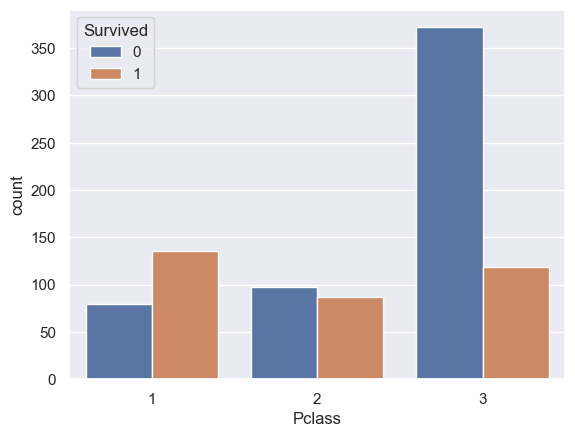

In [24]:
# Create a count plot showing the number of passengers in each Pclass,  
# separated by survival status  
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)

C:\Users\rajib\AppData\Local\Temp\ipykernel_3004\3099314804.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=titanic_data, palette='Set2')


<Axes: xlabel='Pclass', ylabel='Survived'>

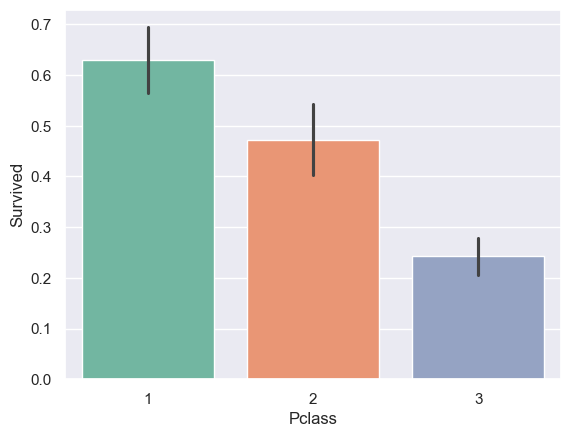

In [25]:
# Survival Rate by Pclass (Bar Plot)
sns.barplot(x='Pclass', y='Survived', data=titanic_data, palette='Set2')

In [26]:
titanic_data.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
442,443,0,3,"Petterson, Mr. Johan Emil",male,25,1,0,347076,7.775,S


<Axes: xlabel='Fare', ylabel='Count'>

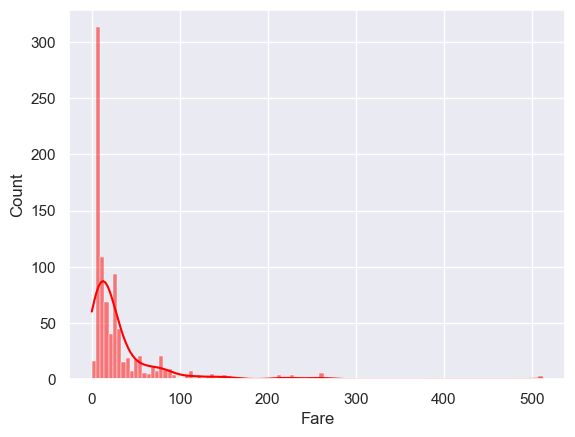

In [27]:
# Fare Distribution Plot
sns.histplot(titanic_data['Fare'], kde=True, color='red')

C:\Users\rajib\AppData\Local\Temp\ipykernel_3004\3596664652.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Age', data=titanic_data, palette=['#5A7DBE', '#fffc00'])


<Axes: xlabel='Survived', ylabel='Age'>

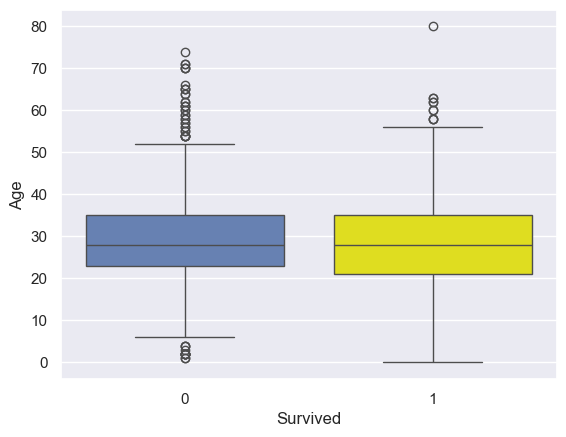

In [28]:
#  Survival Rate by Age (Box Plot)
sns.boxplot(x='Survived', y='Age', data=titanic_data, palette=['#5A7DBE', '#fffc00'])

C:\Users\rajib\AppData\Local\Temp\ipykernel_3004\3099314804.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=titanic_data, palette='Set2')


<Axes: xlabel='Pclass', ylabel='Survived'>

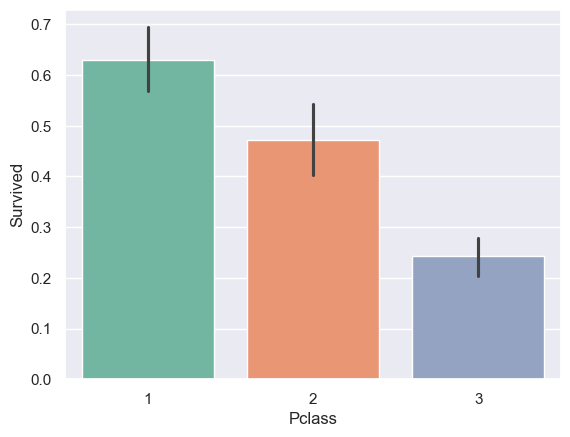

In [29]:
# Survival Rate by Pclass (Bar Plot)
sns.barplot(x='Pclass', y='Survived', data=titanic_data, palette='Set2')

In [30]:
# # Family Size (SibSp + Parch)
# titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch']
# sns.countplot(x='FamilySize', hue='Survived', data=titanic_data, palette=['#5A7DBE', '#50ff00'])

<Axes: xlabel='Embarked', ylabel='count'>

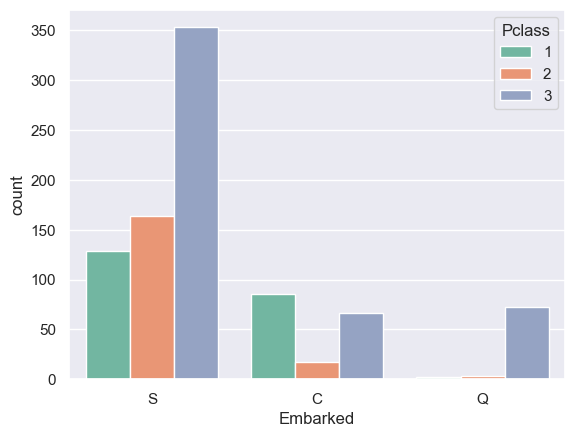

In [31]:
# Survival Rate by Ticket Class and Embarked
sns.countplot(x='Embarked', hue='Pclass', data=titanic_data, palette='Set2')

# Encoding the Categorical Columns

In [33]:
# Count the number of occurrences of each unique value in the 'Sex' column  
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [34]:
# Count the number of occurrences of each unique value in the 'Embarked' column  
titanic_data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [35]:
# converting categorical Columns
titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

C:\Users\rajib\AppData\Local\Temp\ipykernel_3004\1602931427.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)


##### male :0,
##### female :1

In [37]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,0


# Separating features & Target

In [39]:
# Define features (X) by dropping unnecessary columns  
X = titanic_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)  

# Define target variable (y) as the 'Survived' column  
y = titanic_data['Survived']

In [40]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22,1,0,7.2500,0
1,1,1,38,1,0,71.2833,1
2,3,1,26,0,0,7.9250,0
3,1,1,35,1,0,53.1000,0
4,3,0,35,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27,0,0,13.0000,0
887,1,1,19,0,0,30.0000,0
888,3,1,28,1,2,23.4500,0
889,1,0,26,0,0,30.0000,1


In [41]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Splitting the data into training data & Test data

In [43]:
# Split the data into training and testing sets (80% training, 20% testing)  
X_train, X_test, y_train, y_test = train_test_split(X, y,  
                                                    test_size=0.2,  # 20% for testing  
                                                    random_state=2)  # Ensure reproducibility  

# Display the shape of the full dataset, training set, and testing set  
X.shape, X_train.shape, X_test.shape

((891, 7), (712, 7), (179, 7))

# Model Training Logistic Regression

In [45]:
# Create a Logistic Regression model  
lr = LogisticRegression()  
lr

LogisticRegression()

In [46]:
# Train the model using the training data  
lr.fit(X_train, y_train)  

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Evaluation Accuracy Score

In [48]:
# accuracy on training data
X_train_prediction = lr.predict(X_train)

In [49]:
print(X_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [50]:
# Predict the target values for the training data  
X_train_prediction = lr.predict(X_train)  

# Calculate the accuracy score of the training data  
training_data_accuracy = accuracy_score(y_train, X_train_prediction)  
print('Accuracy score of training data : ', training_data_accuracy)  

Accuracy score of training data :  0.8103932584269663


In [51]:
# accuracy on test data
X_test_prediction = lr.predict(X_test)

In [52]:
print(X_test_prediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [53]:
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.7821229050279329


In [54]:
# save